Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x, y]


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\rich\live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


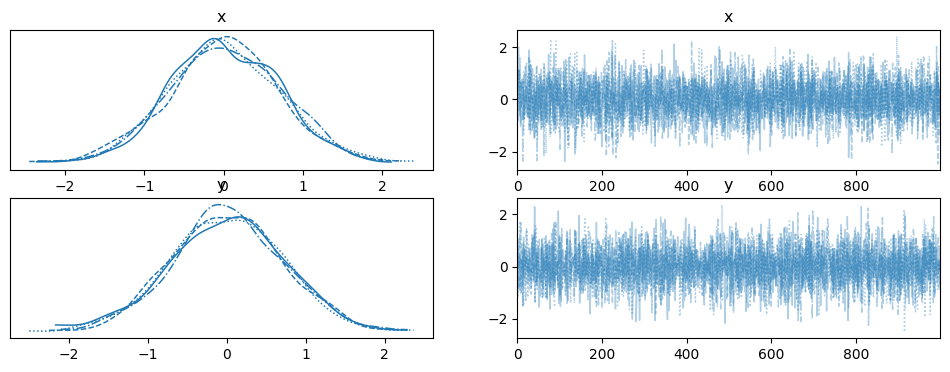

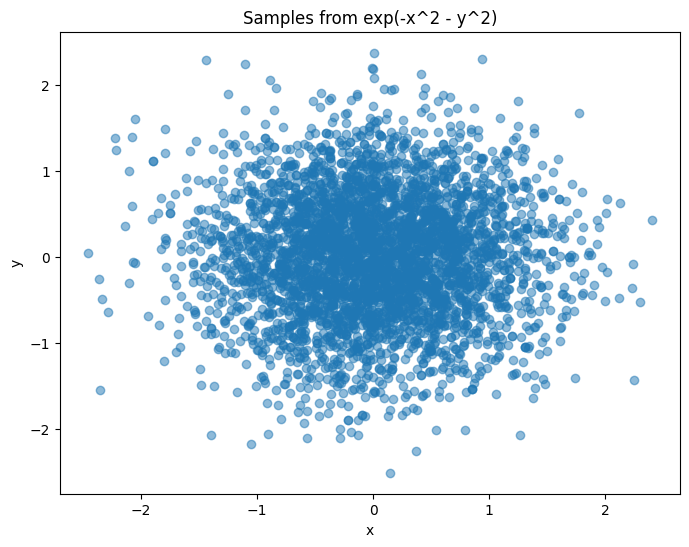

In [23]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

# 自定义对数概率密度函数
def custom_logp(x, y):
    return -x**2 - y**2

# 定义 PyMC 模型
with pm.Model() as model:
    # 定义自定义分布
    x = pm.Uniform('x', lower=-10000, upper=10000)
    y = pm.Uniform('y', lower=-10000, upper=10000)
    
    # 定义联合对数概率密度
    pm.Potential('joint_logp', custom_logp(x, y))
    
    # 采样
    trace = pm.sample(1000, return_inferencedata=True)

# 可视化结果
az.plot_trace(trace)
plt.show()

# 绘制二维散点图
plt.figure(figsize=(8, 6))
plt.scatter(trace.posterior['x'].values.flatten(), trace.posterior['y'].values.flatten(), alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Samples from exp(-x^2 - y^2)')
plt.show()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x, y]


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\rich\live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.


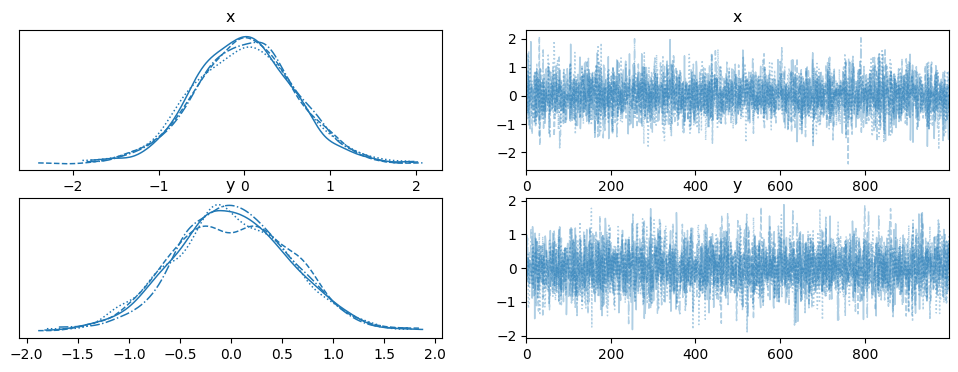

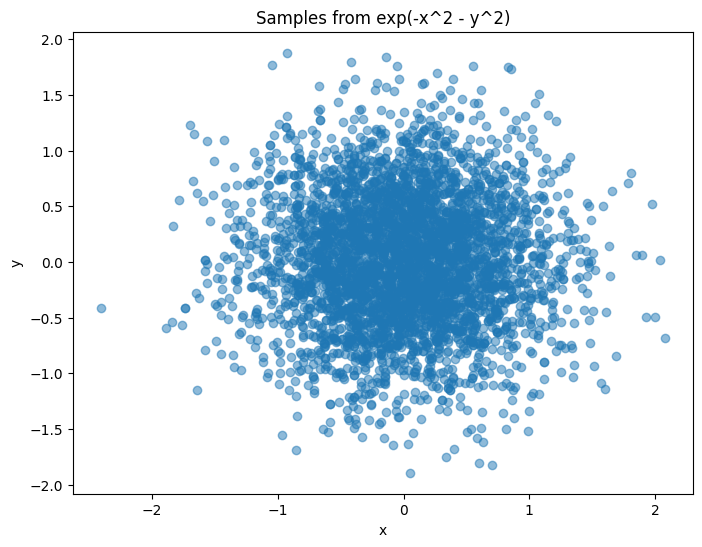

In [1]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

# 自定义对数概率密度函数
def custom_logp(x, y):
    return -x**2 - y**2

# 定义 PyMC 模型
with pm.Model() as model:
    # 定义自定义分布
    x = pm.Normal('x', mu=0, sigma=1) 
    y = pm.Normal('y', mu=0, sigma=1)
    
    # 定义联合对数概率密度
    pm.Potential('joint_logp', custom_logp(x, y))
    
    # 采样
    trace = pm.sample(1000, return_inferencedata=True)

# 可视化结果
az.plot_trace(trace)
plt.show()

# 绘制二维散点图
plt.figure(figsize=(8, 6))
plt.scatter(trace.posterior['x'].values.flatten(), trace.posterior['y'].values.flatten(), alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Samples from exp(-x^2 - y^2)')
plt.show()

In [1]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
import theano.tensor as tt

# 定义高斯点扩散函数（PSF）
def gaussian_psf(size, sigma):
    x = np.linspace(-size // 2, size // 2, size)
    y = np.linspace(-size // 2, size // 2, size)
    x, y = np.meshgrid(x, y)
    psf = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return psf / psf.sum()

# 添加泊松噪声
def add_poisson_noise(image):
    noisy_image = np.random.poisson(image)
    return noisy_image

def main():
    # 生成ground truth图像
    ground_truth = np.zeros((100, 100))
    ground_truth[45:55, 45:55] = 1.0  # 简单的点源

    # 定义PSF并进行卷积
    psf = gaussian_psf(size=21, sigma=3)
    convolved_image = convolve2d(ground_truth, psf, mode='same')

    # 添加泊松噪声
    noisy_image = add_poisson_noise(convolved_image)

    # 定义PyMC模型
    with pm.Model() as model:
        # 定义ground truth图像的先验
        ground_truth_prior = pm.Normal('ground_truth', mu=0, sigma=1, shape=ground_truth.shape)

        # 卷积操作
        ground_truth_prior_reshaped = ground_truth_prior.reshape((1, 1) + ground_truth.shape)
        psf_reshaped = psf.reshape((1, 1) + psf.shape)
        convolved = tt.nnet.conv2d(ground_truth_prior_reshaped, psf_reshaped, border_mode='half')[0, 0]

        # 观测数据
        observed = pm.Poisson('observed', mu=convolved, observed=noisy_image)

        # 采样
        trace = pm.sample(10000, return_inferencedata=True)

    # 可视化结果
    az.plot_trace(trace)
    plt.show()

if __name__ == '__main__':
    main()


You can find the C code in this temporary file: C:\Users\ADMINI~1\AppData\Local\Temp\theano_compilation_error_52dao8z7


Exception: Compilation failed (return status=1): C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp: In function 'PyObject* pycall(CLazyLinker*, Py_ssize_t, int)':. C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp:499:43: error: 'PyInt_AsLong' was not declared in this scope.            long icount = PyInt_AsLong(count);.                                            ^. C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp:501:51: error: 'PyInt_FromLong' was not declared in this scope.                           PyInt_FromLong(icount + 1));.                                                    ^. C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp: In function 'int c_call(CLazyLinker*, Py_ssize_t, int)':. C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp:528:39: error: 'PyInt_AsLong' was not declared in this scope.        long icount = PyInt_AsLong(count);.                                        ^. C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp:529:74: error: 'PyInt_FromLong' was not declared in this scope.        PyList_SetItem(self->call_counts, node_idx, PyInt_FromLong(icount+1));.                                                                           ^. C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp: In function 'PyObject* CLazyLinker_call(PyObject*, PyObject*, PyObject*)':. C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp:823:37: error: 'PyInt_Check' was not declared in this scope.                if (! PyInt_Check(elem)).                                      ^. C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp:828:46: error: 'PyInt_AsLong' was not declared in this scope.                output_subset[PyInt_AsLong(elem)] = 1;.                                               ^. C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp:835:36: error: 'PyInt_FromLong' was not declared in this scope.    PyObject * one = PyInt_FromLong(1);.                                     ^. C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp: At global scope:. C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp:1053:1: error: invalid conversion from 'const char*' to 'Py_ssize_t {aka long long int}' [-fpermissive].  };.  ^. C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp:1053:1: error: invalid conversion from 'void (*)(PyObject*) {aka void (*)(_object*)}' to 'Py_ssize_t {aka long long int}' [-fpermissive]. C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp:1053:1: error: invalid conversion from 'PyObject* (*)(PyObject*, PyObject*, PyObject*) {aka _object* (*)(_object*, _object*, _object*)}' to 'reprfunc {aka _object* (*)(_object*)}' [-fpermissive]. C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp:1053:1: error: invalid conversion from 'long unsigned int' to 'const char*' [-fpermissive]. C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp:1053:1: error: cannot convert 'const char*' to 'traverseproc {aka int (*)(_object*, int (*)(_object*, void*), void*)}' in initialization. C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp:1053:1: error: cannot convert 'PyMemberDef*' to 'PyGetSetDef*' in initialization. C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp:1053:1: error: cannot convert 'PyGetSetDef*' to 'PyTypeObject* {aka _typeobject*}' in initialization. C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp:1053:1: error: invalid conversion from 'initproc {aka int (*)(_object*, _object*, _object*)}' to 'allocfunc {aka _object* (*)(_typeobject*, long long int)}' [-fpermissive]. C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp:1053:1: error: invalid conversion from 'PyObject* (*)(PyTypeObject*, PyObject*, PyObject*) {aka _object* (*)(_typeobject*, _object*, _object*)}' to 'freefunc {aka void (*)(void*)}' [-fpermissive]. C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp: In function 'PyObject* initlazylinker_ext()':. C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp:1093:9: error: return-statement with no value, in function returning 'PyObject* {aka _object*}' [-fpermissive].          return RETVAL;.          ^. C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp:1098:72: error: 'Py_InitModule3' was not declared in this scope.                         "Example module that creates an extension type.");.                                                                         ^. C:\Users\Administrator\AppData\Local\Theano\compiledir_Windows-10-10.0.26100-SP0-Intel64_Family_6_Model_151_Stepping_2_GenuineIntel-3.11.9-64\lazylinker_ext\mod.cpp:1103:5: error: return-statement with no value, in function returning 'PyObject* {aka _object*}' [-fpermissive].      return RETVAL;.      ^. 